# Logistic regression

## Binary logistic regression

For the sake of simplicity, assume that we are working with binary classification tasks. In logistic regression, we model the posterior distribution as 

$$\mathbb{P}\{y=k|X\} = \sigma(\beta_k^TX)=\frac{1}{1+\exp(-\beta_k^TX)}$$

Where $\sigma$ denote the sigmoid function

$$\sigma(z)=\frac{1}{1+\exp(-z)}$$

As shown in Figure 1, the sigmoid function compresses real numbers down to the interval $(0,1)$, which makes it a valid probability measure. The next question is how do we estimate the parameters $\beta_k$? Let $\mathcal{D}=\{(X_i, y_i)\}_{i\in [n]}$ be the training dataset, the log-likelihood is given by 

$$
\begin{align*}
    l(\beta|\mathcal{D}) &= \log\prod_{i=1}^n \bigg[\mathbb{P}\{y=0|X\}^{\mathbb{1}\{y_i=0\}}\mathbb{P}\{y=1|X\}^{\mathbb{1}\{y_i=1\}}\bigg]\\
    &= \sum_{i=1}^n \mathbb{1}\{y_i=0\}\log \mathbb{P}\{y=0|X\} + \mathbb{1}\{y_i=1\}\log \mathbb{P}\{y=1|X\}\\
    &= \sum_{i=1}^n y_i\log \mathbb{P}\{y=0|X\} + (1-y_i)\log \mathbb{P}\{y=1|X\}
\end{align*}
$$

In the case of binary classification, we have

$$\mathbb{P}\{y=0|X\}=\frac{1}{1+\exp(-\beta_0^TX)}\hspace{8mm} \mathbb{P}\{y=1|X\} =\frac{\exp(-\beta_0^TX)}{1+\exp(-\beta_0^TX)}=\frac{1}{1+\exp(\beta_0^TX)}$$

Since probability must sum to one. Substituting these expressions, we have

$$
\begin{align*}
    l(\beta|\mathcal{D}) 
    &= \sum_{i=1}^n \bigg[y_i\beta_0^TX_i-\log(1+\exp(\beta_0^TX_i))\bigg]
\end{align*}
$$

To find the minimizer, consider setting its gradient to $0$

$$
\nabla_{\beta_0} l = \sum_{i=1}^n \bigg[y_iX_i - \frac{\exp(\beta_0^TX_i)}{1+\exp(\beta_0^TX_i)}X_i\bigg]=0
$$

The first order condition, unlike linear regression, does not have a closed form solution. Therefore, to find the minimizer, we need to use algorithms such as gradient descent. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [15]:
class BinaryLogisticRegression:
    
    def __init__(self, d):
        self.beta = np.random.randn(d, 1)
    
    def fit(self, X, y, maxIter=500, lr=1e-3):
        n_iter = 0
        while n_iter < maxIter:
            self.grad_step(X, y, lr)
            n_iter += 1
    
    def predict(self, X):
        probabilities = self._sigmoid(np.dot(X, self.beta))
        return (probabilities >= 0.5).astype(int)
    
    def grad_step(self, X, y, lr):
        predictions = self._sigmoid(np.dot(X, self.beta))
        errors = predictions - y[:, np.newaxis]
        gradient = np.dot(X.T, errors)
        self.beta -= lr * gradient / len(y)
    
    def _sigmoid(self, z):
        # Sigmoid function
        return 1 / (1 + np.exp(-z))

In [16]:
lr = BinaryLogisticRegression(2)

In [24]:
mean1 = [1, 1]
mean2 = [-5, -1]
cov = [[0.5, 0], [0, 0.5]]

class1 = np.random.multivariate_normal(mean1, cov, 50)
class2 = np.random.multivariate_normal(mean2, cov, 50)

X = np.concatenate((class1, class2), axis=0)
y = np.array([0] * 50 + [1] * 50)

print(f"Shape of feature matrix: {X.shape}")
print(f"Shape of response matrix: {y.shape}")

Shape of feature matrix: (100, 2)
Shape of response matrix: (100,)


In [25]:
lr.fit(X, y, maxIter=10000)

In [26]:
h = 0.05

cmap_light = ListedColormap(['#FFAAAA66', '#AAFFAA66', '#AAAAFF66'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = -7, 3
y_min, y_max = -4.5, 7
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)

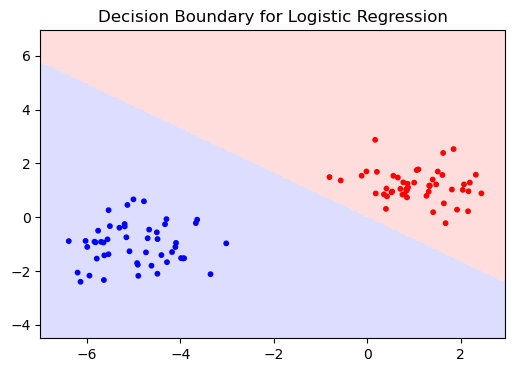

In [27]:
plt.figure(figsize=(6, 4))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=10)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundary for Logistic Regression")
plt.show()

Note that the decision boundary of logistic regression is linear, this can be seen from the fact that

$$\frac{\mathbb{P}\{Y=1|X=x\}}{\mathbb{P}\{Y=0|X=x\}}>1\Longleftrightarrow 1\geq \exp(\beta^Tx_i)\Longleftrightarrow \beta^Tx_i=0$$

## Multiple class logistic regression

Now suppose there are $K$ classes. In this case, we model the posterior as

$$\mathbb{P}\{y=k|X\} = \frac{\exp(-\beta_k^TX)}{1+\sum_{i=1}^{K-1}\exp(-\beta_i^TX)}\hspace{5mm}\text{for}\;k=1,2,...,K-1$$

And to ensure that the probabilities sum up to $1$, let

$$\mathbb{P}\{y=K|X\} =\frac{1}{1+\exp(-\beta_k^TX)}$$

Like before, the parameters can be estimated using gradient descent.